<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/autoencoder/Compare_two_images_by_FID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FID TEST

In [1]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize
import PIL.Image as pilimg
from keras.datasets import cifar10

In [2]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return np.asarray(images_list)

In [3]:
# calculate frechet inception distance
def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = np.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if np.iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [4]:
img1 = pilimg.open('A_15121.jpg')
img2 = pilimg.open('A_15122.jpg')
img3 = pilimg.open('A_10394.jpg')
pix1 = np.array(img1)
pix2 = np.array(img2)
pix3 = np.array(img3)

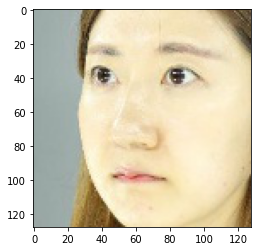

In [5]:
plt.imshow(pix1)
plt.show()

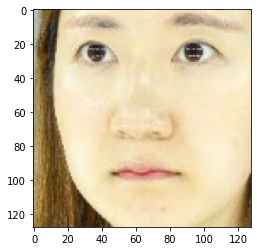

In [6]:
plt.imshow(pix2)
plt.show()

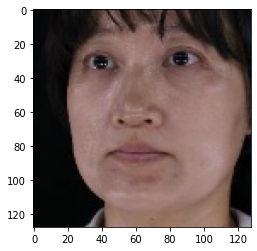

In [7]:
plt.imshow(pix3)
plt.show()

In [8]:
#do not need to reshape
print(pix1.shape)
print(pix2.shape)
print(pix3.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [9]:
pix1 = pix1.astype('float32')
pix2 = pix2.astype('float32')
pix3 = pix3.astype('float32')

'''
pix1 = scale_images(pix1, (128, 128, 3))
pix2 = scale_images(pix2, (128, 128, 3))
'''

'\npix1 = scale_images(pix1, (128, 128, 3))\npix2 = scale_images(pix2, (128, 128, 3))\n'

In [10]:
pix1 = preprocess_input(pix1)
pix2 = preprocess_input(pix2)
pix3 = preprocess_input(pix3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


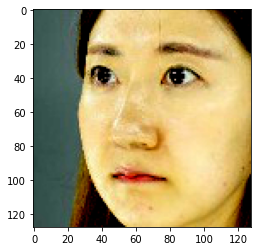

In [11]:
plt.imshow(pix1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


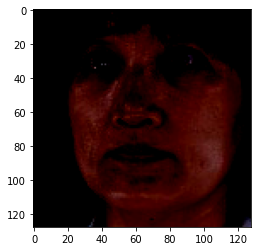

In [12]:
plt.imshow(pix3)
plt.show()

In [13]:
pix1 = np.reshape(pix1, (1*128, 128*3))
pix2 = np.reshape(pix2, (1*128, 128*3))
pix3 = np.reshape(pix3, (1*128, 128*3))

In [17]:
fid_same = calculate_fid(pix1, pix2) #same
fid_dif1 = calculate_fid(pix1, pix3) #same_
fid_dif2 = calculate_fid(pix2, pix3) #different

In [18]:
fid_same

45.54624158523684

In [19]:
fid_dif1

330.46737172988173

In [20]:
fid_dif2

318.8121766909635